# 04 - Category Theory Diagrams & Formal Semantics

Visualize the categorical-cybernetic framework for OSS governance.

**Concepts:**
- **Objects**: Governance types (Stadium, Federation, Club, Toy)
- **Morphisms**: Transitions between governance states
- **Functors**: Mappings from OSS → VSM (Viable System Model)
- **Adjunctions**: Specification ⊣ Freedom relationship
- **Natural Transformations**: Evolution patterns

## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch, Circle
from matplotlib.path import Path
import matplotlib.patheffects as path_effects
from pathlib import Path as FilePath

# Create output directory
output_dir = FilePath("../docs/diagrams")
output_dir.mkdir(parents=True, exist_ok=True)

# Style settings
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 11
plt.rcParams['font.family'] = 'sans-serif'

# Color palette
COLORS = {
    'stadium': '#E74C3C',      # Red
    'federation': '#3498DB',   # Blue
    'club': '#27AE60',         # Green
    'toy': '#95A5A6',          # Gray
    'arrow': '#2C3E50',        # Dark
    'functor': '#9B59B6',      # Purple
    'adjunction': '#F39C12',   # Orange
}

print("✅ Setup complete!")

✅ Setup complete!


## 1. OSS Governance Category (𝐎𝐒𝐒)

The category of OSS governance types based on Asparouhova's taxonomy.

/var/folders/vv/ckmfyvqd4hj331_36wmp26l80000gn/T/ipykernel_73769/1372621842.py:83: UserWarning: Glyph 119822 (\N{MATHEMATICAL BOLD CAPITAL O}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vv/ckmfyvqd4hj331_36wmp26l80000gn/T/ipykernel_73769/1372621842.py:83: UserWarning: Glyph 119826 (\N{MATHEMATICAL BOLD CAPITAL S}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vv/ckmfyvqd4hj331_36wmp26l80000gn/T/ipykernel_73769/1372621842.py:84: UserWarning: Glyph 119822 (\N{MATHEMATICAL BOLD CAPITAL O}) missing from font(s) DejaVu Sans.
  plt.savefig(output_dir / '01_oss_category.png', dpi=150, bbox_inches='tight',
/var/folders/vv/ckmfyvqd4hj331_36wmp26l80000gn/T/ipykernel_73769/1372621842.py:84: UserWarning: Glyph 119826 (\N{MATHEMATICAL BOLD CAPITAL S}) missing from font(s) DejaVu Sans.
  plt.savefig(output_dir / '01_oss_category.png', dpi=150, bbox_inches='tight',
/opt/homebrew/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Gl

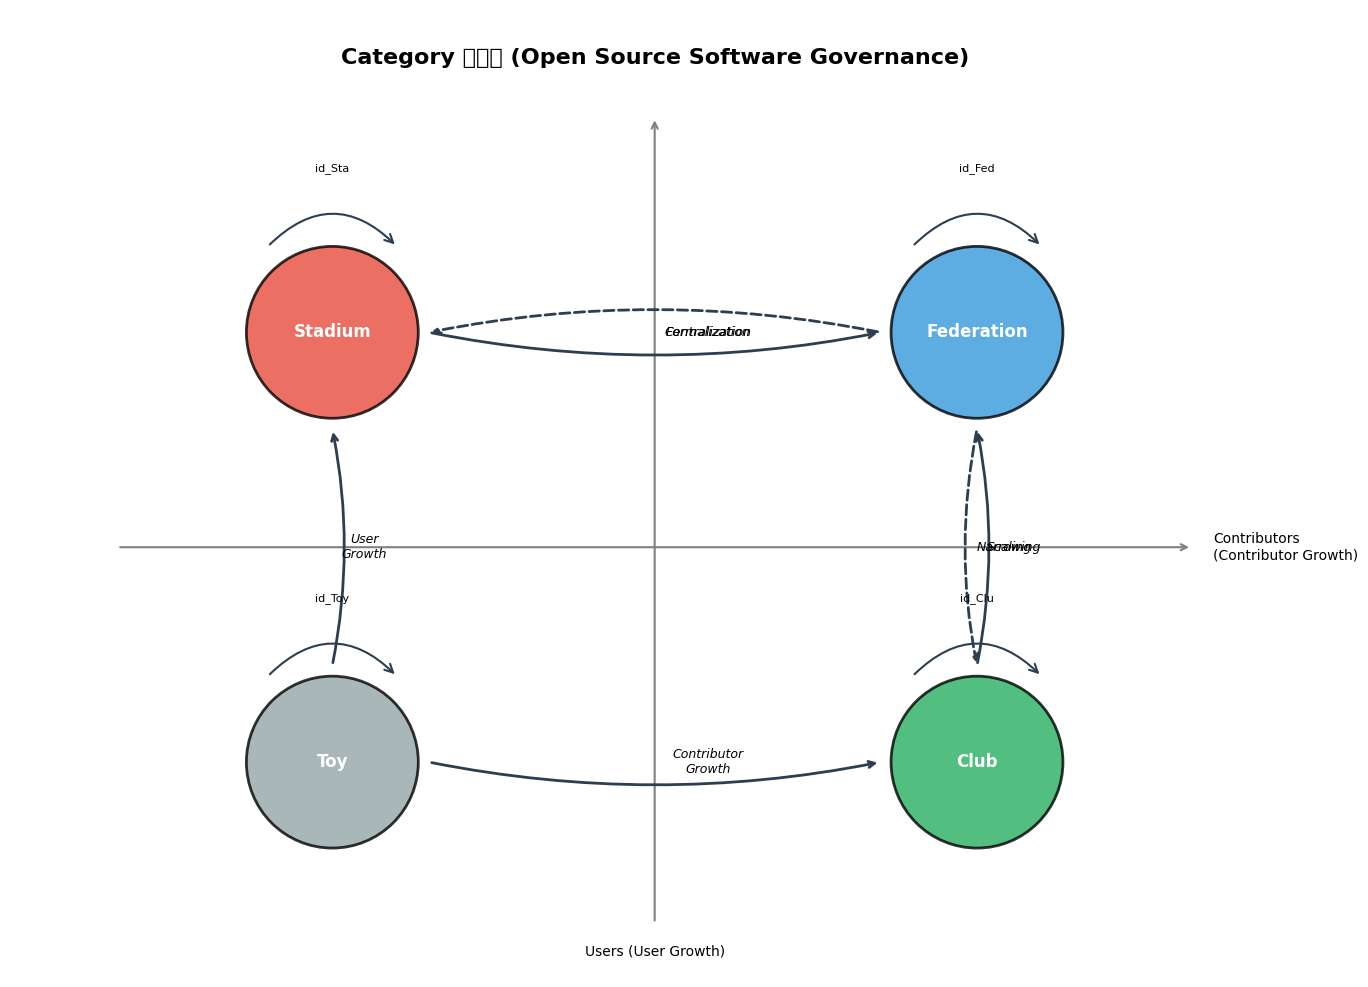

Saved: ../docs/diagrams/01_oss_category.png

  Legend:
  → Solid arrows: Growth transitions
  ⇢ Dashed arrows: Decline transitions


In [2]:
def draw_oss_category():
    """Draw the OSS governance category with objects and morphisms."""
    fig, ax = plt.subplots(figsize=(14, 10))
    ax.set_xlim(-1, 11)
    ax.set_ylim(0, 9)
    ax.set_aspect('equal')
    ax.axis('off')
    
    # Title
    ax.text(5, 8.5, 'Category 𝐎𝐒𝐒 (Open Source Software Governance)', 
            fontsize=16, fontweight='bold', ha='center')
    
    # Object positions (2x2 grid based on Asparouhova's axes)
    objects = {
        'Stadium':    (2, 6, COLORS['stadium']),    # High users, Low contributors
        'Federation': (8, 6, COLORS['federation']), # High users, High contributors  
        'Toy':        (2, 2, COLORS['toy']),        # Low users, Low contributors
        'Club':       (8, 2, COLORS['club']),       # Low users, High contributors
    }
    
    # Draw objects as circles
    for name, (x, y, color) in objects.items():
        circle = Circle((x, y), 0.8, fill=True, facecolor=color, 
                        edgecolor='black', linewidth=2, alpha=0.8)
        ax.add_patch(circle)
        ax.text(x, y, name, ha='center', va='center', fontsize=12, 
               fontweight='bold', color='white')
    
    # Axis labels
    ax.annotate('', xy=(10, 4), xytext=(0, 4),
                arrowprops=dict(arrowstyle='->', lw=1.5, color='gray'))
    ax.text(10.2, 4, 'Contributors\n(Contributor Growth)', fontsize=10, va='center')
    
    ax.annotate('', xy=(5, 8), xytext=(5, 0.5),
                arrowprops=dict(arrowstyle='->', lw=1.5, color='gray'))
    ax.text(5, 0.2, 'Users (User Growth)', fontsize=10, ha='center')
    
    # Morphisms (transitions)
    morphisms = [
        # Growth transitions
        ('Toy', 'Stadium', 'user_growth', 'User\nGrowth'),
        ('Toy', 'Club', 'contrib_growth', 'Contributor\nGrowth'),
        ('Stadium', 'Federation', 'formalize', 'Formalization'),
        ('Club', 'Federation', 'scale', 'Scaling'),
        # Decline transitions (dashed)
        ('Federation', 'Stadium', 'centralize', 'Centralization'),
        ('Federation', 'Club', 'narrow', 'Narrowing'),
    ]
    
    for start, end, name, label in morphisms:
        x1, y1, _ = objects[start]
        x2, y2, _ = objects[end]
        
        # Calculate arrow positions (offset from circle edge)
        dx, dy = x2 - x1, y2 - y1
        dist = np.sqrt(dx**2 + dy**2)
        dx, dy = dx/dist, dy/dist
        
        x1_adj, y1_adj = x1 + dx*0.9, y1 + dy*0.9
        x2_adj, y2_adj = x2 - dx*0.9, y2 - dy*0.9
        
        # Draw arrow
        style = 'dashed' if name in ['centralize', 'narrow'] else 'solid'
        ax.annotate('', xy=(x2_adj, y2_adj), xytext=(x1_adj, y1_adj),
                   arrowprops=dict(arrowstyle='->', lw=2, color=COLORS['arrow'],
                                  linestyle=style, connectionstyle='arc3,rad=0.1'))
        
        # Label
        mid_x, mid_y = (x1 + x2)/2, (y1 + y2)/2
        offset = 0.5 if x1 != x2 else 0.3
        ax.text(mid_x + offset, mid_y, label, fontsize=9, 
               style='italic', ha='center', va='center')
    
    # Identity morphisms (loops)
    for name, (x, y, color) in objects.items():
        loop = mpatches.FancyArrowPatch((x-0.6, y+0.8), (x+0.6, y+0.8),
                                        connectionstyle="arc3,rad=-0.5",
                                        arrowstyle='->', mutation_scale=15,
                                        color=COLORS['arrow'], lw=1.5)
        ax.add_patch(loop)
        ax.text(x, y+1.5, f'id_{name[:3]}', fontsize=8, ha='center')
    
    plt.tight_layout()
    plt.savefig(output_dir / '01_oss_category.png', dpi=150, bbox_inches='tight',
               facecolor='white', edgecolor='none')
    plt.show()
    
    # Print explanation to console
    print(f"Saved: {output_dir / '01_oss_category.png'}")
    print("\n  Legend:")
    print("  → Solid arrows: Growth transitions")
    print("  ⇢ Dashed arrows: Decline transitions")

draw_oss_category()

## 2. Viable System Model Category (𝐕𝐒𝐌)

Stafford Beer's VSM as a category of organizational subsystems.

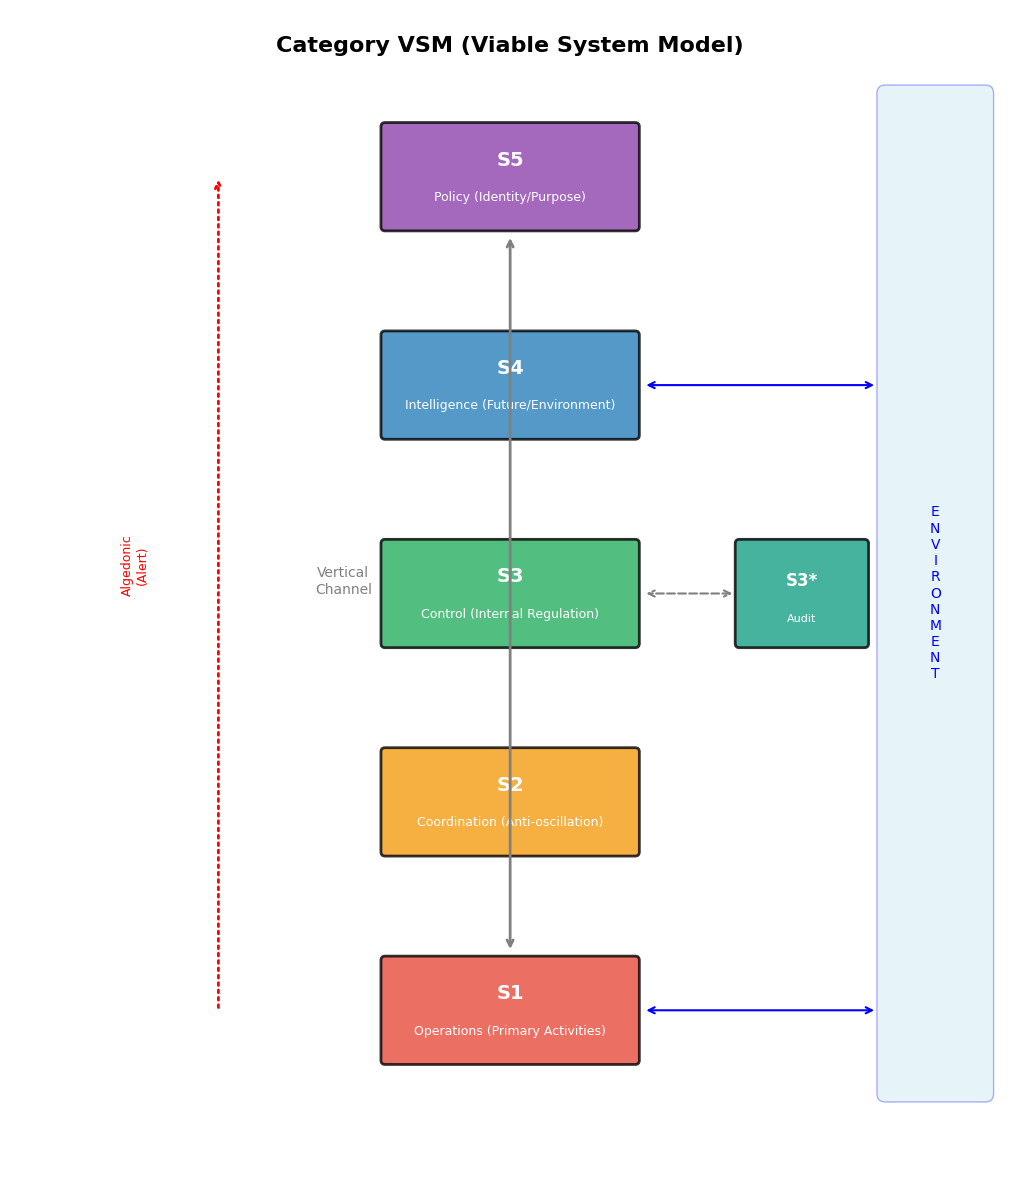

Saved: ../docs/diagrams/02_vsm_category.png


In [3]:
def draw_vsm_category():
    """Draw the VSM category with S1-S5 subsystems."""
    fig, ax = plt.subplots(figsize=(12, 12))
    ax.set_xlim(-1, 11)
    ax.set_ylim(-1, 13)
    ax.set_aspect('equal')
    ax.axis('off')
    
    # Title - use regular text instead of special Unicode
    ax.text(5, 12.5, 'Category VSM (Viable System Model)', 
            fontsize=16, fontweight='bold', ha='center')
    
    # VSM Subsystems (hierarchical arrangement with more spacing)
    subsystems = {
        'S5': (5, 11, '#8E44AD', 'Policy (Identity/Purpose)'),
        'S4': (5, 8.5, '#2980B9', 'Intelligence (Future/Environment)'),
        'S3': (5, 6, '#27AE60', 'Control (Internal Regulation)'),
        'S3*': (8.5, 6, '#16A085', 'Audit'),
        'S2': (5, 3.5, '#F39C12', 'Coordination (Anti-oscillation)'),
        'S1': (5, 1, '#E74C3C', 'Operations (Primary Activities)'),
    }
    
    # Draw subsystems
    for name, (x, y, color, desc) in subsystems.items():
        # Box
        width = 3 if name != 'S3*' else 1.5
        height = 1.2
        rect = FancyBboxPatch((x - width/2, y - height/2), width, height,
                              boxstyle="round,pad=0.05", 
                              facecolor=color, edgecolor='black',
                              linewidth=2, alpha=0.8)
        ax.add_patch(rect)
        
        # Name and description inside box
        if name == 'S3*':
            ax.text(x, y + 0.15, name, ha='center', va='center', 
                   fontsize=12, fontweight='bold', color='white')
            ax.text(x, y - 0.3, desc, ha='center', va='center', 
                   fontsize=8, color='white')
        else:
            ax.text(x, y + 0.2, name, ha='center', va='center', 
                   fontsize=14, fontweight='bold', color='white')
            ax.text(x, y - 0.25, desc, ha='center', va='center', 
                   fontsize=9, color='white')
    
    # Vertical channel (information flow)
    ax.annotate('', xy=(5, 10.3), xytext=(5, 1.7),
               arrowprops=dict(arrowstyle='<->', lw=2, color='gray',
                              connectionstyle='arc3,rad=0'))
    ax.text(3, 6, 'Vertical\nChannel', fontsize=10, ha='center', color='gray')
    
    # S3* connection
    ax.annotate('', xy=(6.6, 6), xytext=(7.7, 6),
               arrowprops=dict(arrowstyle='<->', lw=1.5, color='gray',
                              linestyle='dashed'))
    
    # Environment
    env_rect = FancyBboxPatch((9.5, 0), 1.2, 12,
                              boxstyle="round,pad=0.1",
                              facecolor='lightblue', edgecolor='blue',
                              linewidth=1, alpha=0.3)
    ax.add_patch(env_rect)
    ax.text(10.1, 6, 'E\nN\nV\nI\nR\nO\nN\nM\nE\nN\nT', 
           ha='center', va='center', fontsize=10, color='blue')
    
    # S4 <-> Environment
    ax.annotate('', xy=(9.4, 8.5), xytext=(6.6, 8.5),
               arrowprops=dict(arrowstyle='<->', lw=1.5, color='blue'))
    
    # S1 <-> Environment  
    ax.annotate('', xy=(9.4, 1), xytext=(6.6, 1),
               arrowprops=dict(arrowstyle='<->', lw=1.5, color='blue'))
    
    # Algedonic channel (alert)
    ax.annotate('', xy=(1.5, 11), xytext=(1.5, 1),
               arrowprops=dict(arrowstyle='->', lw=2, color='red',
                              linestyle='dotted'))
    ax.text(0.5, 6, 'Algedonic\n(Alert)', fontsize=9, ha='center', 
           color='red', rotation=90)
    
    plt.tight_layout()
    plt.savefig(output_dir / '02_vsm_category.png', dpi=150, bbox_inches='tight',
               facecolor='white', edgecolor='none')
    plt.show()
    print(f"Saved: {output_dir / '02_vsm_category.png'}")

draw_vsm_category()

## 3. Functor: OSS → VSM

The structure-preserving mapping from OSS governance to VSM subsystems.

/var/folders/vv/ckmfyvqd4hj331_36wmp26l80000gn/T/ipykernel_73769/3361939981.py:70: UserWarning: Glyph 119822 (\N{MATHEMATICAL BOLD CAPITAL O}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vv/ckmfyvqd4hj331_36wmp26l80000gn/T/ipykernel_73769/3361939981.py:70: UserWarning: Glyph 119826 (\N{MATHEMATICAL BOLD CAPITAL S}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vv/ckmfyvqd4hj331_36wmp26l80000gn/T/ipykernel_73769/3361939981.py:70: UserWarning: Glyph 119829 (\N{MATHEMATICAL BOLD CAPITAL V}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vv/ckmfyvqd4hj331_36wmp26l80000gn/T/ipykernel_73769/3361939981.py:70: UserWarning: Glyph 119820 (\N{MATHEMATICAL BOLD CAPITAL M}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vv/ckmfyvqd4hj331_36wmp26l80000gn/T/ipykernel_73769/3361939981.py:71: UserWarning: Glyph 119822 (\N{MATHEMATICAL BOLD CAPITAL O}) missing from font(s) DejaVu Sans.
  plt.savefig(output_dir / '03_

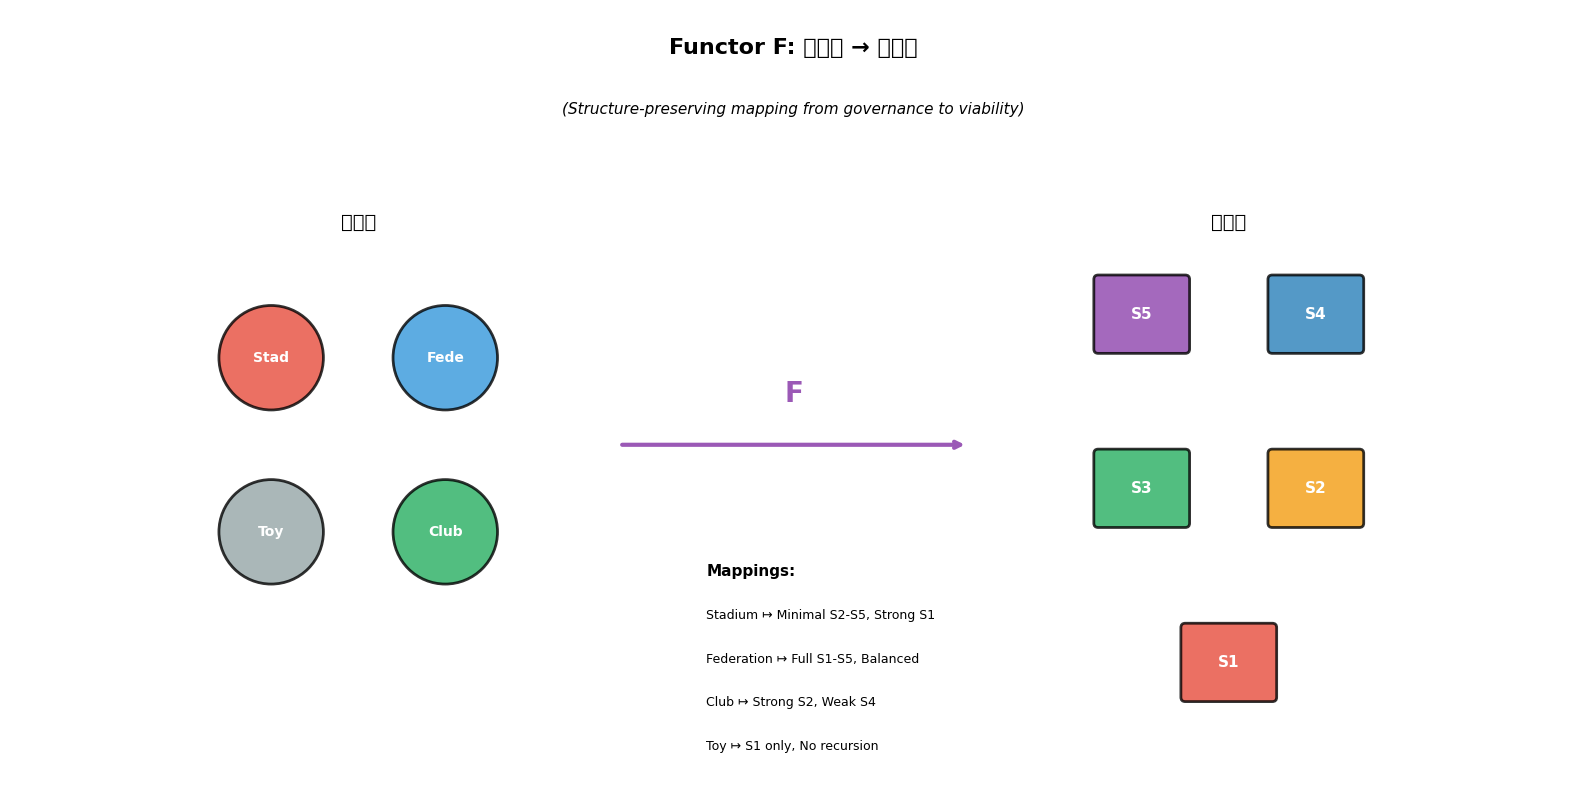

Saved: ../docs/diagrams/03_functor_oss_vsm.png

  Functor Properties:
  • F(id_X) = id_F(X)  (preserves identity)
  • F(g ∘ f) = F(g) ∘ F(f)  (preserves composition)
  • Maps entropy to coordination load


In [4]:
def draw_functor_diagram():
    """Draw the functor F: OSS → VSM."""
    fig, ax = plt.subplots(figsize=(16, 10))
    ax.set_xlim(-1, 17)
    ax.set_ylim(2, 11)
    ax.set_aspect('equal')
    ax.axis('off')
    
    # Title
    ax.text(8, 10.5, 'Functor F: 𝐎𝐒𝐒 → 𝐕𝐒𝐌', 
            fontsize=16, fontweight='bold', ha='center')
    ax.text(8, 9.8, '(Structure-preserving mapping from governance to viability)', 
            fontsize=11, ha='center', style='italic')
    
    # OSS Category (left side)
    ax.text(3, 8.5, '𝐎𝐒𝐒', fontsize=14, fontweight='bold', ha='center')
    
    oss_objects = {
        'Stadium':    (2, 7, COLORS['stadium']),
        'Federation': (4, 7, COLORS['federation']),
        'Club':       (4, 5, COLORS['club']),
        'Toy':        (2, 5, COLORS['toy']),
    }
    
    for name, (x, y, color) in oss_objects.items():
        circle = Circle((x, y), 0.6, fill=True, facecolor=color,
                        edgecolor='black', linewidth=2, alpha=0.8)
        ax.add_patch(circle)
        ax.text(x, y, name[:4], ha='center', va='center', 
               fontsize=10, fontweight='bold', color='white')
    
    # VSM Category (right side)
    ax.text(13, 8.5, '𝐕𝐒𝐌', fontsize=14, fontweight='bold', ha='center')
    
    vsm_objects = {
        'S5': (12, 7.5, '#8E44AD'),
        'S4': (14, 7.5, '#2980B9'),
        'S3': (12, 5.5, '#27AE60'),
        'S2': (14, 5.5, '#F39C12'),
        'S1': (13, 3.5, '#E74C3C'),
    }
    
    for name, (x, y, color) in vsm_objects.items():
        rect = FancyBboxPatch((x-0.5, y-0.4), 1, 0.8,
                              boxstyle="round,pad=0.05",
                              facecolor=color, edgecolor='black',
                              linewidth=2, alpha=0.8)
        ax.add_patch(rect)
        ax.text(x, y, name, ha='center', va='center',
               fontsize=11, fontweight='bold', color='white')
    
    # Functor arrow (big F)
    ax.annotate('', xy=(10, 6), xytext=(6, 6),
               arrowprops=dict(arrowstyle='->', lw=3, color=COLORS['functor']))
    ax.text(8, 6.5, 'F', fontsize=20, fontweight='bold', 
           ha='center', color=COLORS['functor'])
    
    # Mapping descriptions
    mappings = [
        ('Stadium', 'Minimal S2-S5, Strong S1'),
        ('Federation', 'Full S1-S5, Balanced'),
        ('Club', 'Strong S2, Weak S4'),
        ('Toy', 'S1 only, No recursion'),
    ]
    
    ax.text(7, 4.5, 'Mappings:', fontsize=11, fontweight='bold')
    for i, (oss_type, desc) in enumerate(mappings):
        ax.text(7, 4 - i*0.5, f'{oss_type} ↦ {desc}', fontsize=9)
    
    plt.tight_layout()
    plt.savefig(output_dir / '03_functor_oss_vsm.png', dpi=150, bbox_inches='tight',
               facecolor='white', edgecolor='none')
    plt.show()
    
    # Print functor properties to console
    print(f"Saved: {output_dir / '03_functor_oss_vsm.png'}")
    print("\n  Functor Properties:")
    print("  • F(id_X) = id_F(X)  (preserves identity)")
    print("  • F(g ∘ f) = F(g) ∘ F(f)  (preserves composition)")
    print("  • Maps entropy to coordination load")

draw_functor_diagram()

## 4. Adjunction: Specification ⊣ Freedom

The fundamental adjunction between governance specification and contributor freedom.

/var/folders/vv/ckmfyvqd4hj331_36wmp26l80000gn/T/ipykernel_73769/732630758.py:61: UserWarning: Glyph 119810 (\N{MATHEMATICAL BOLD CAPITAL C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vv/ckmfyvqd4hj331_36wmp26l80000gn/T/ipykernel_73769/732630758.py:61: UserWarning: Glyph 119848 (\N{MATHEMATICAL BOLD SMALL O}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vv/ckmfyvqd4hj331_36wmp26l80000gn/T/ipykernel_73769/732630758.py:61: UserWarning: Glyph 119847 (\N{MATHEMATICAL BOLD SMALL N}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vv/ckmfyvqd4hj331_36wmp26l80000gn/T/ipykernel_73769/732630758.py:61: UserWarning: Glyph 119852 (\N{MATHEMATICAL BOLD SMALL S}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vv/ckmfyvqd4hj331_36wmp26l80000gn/T/ipykernel_73769/732630758.py:61: UserWarning: Glyph 119853 (\N{MATHEMATICAL BOLD SMALL T}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vv/ckmfyvq

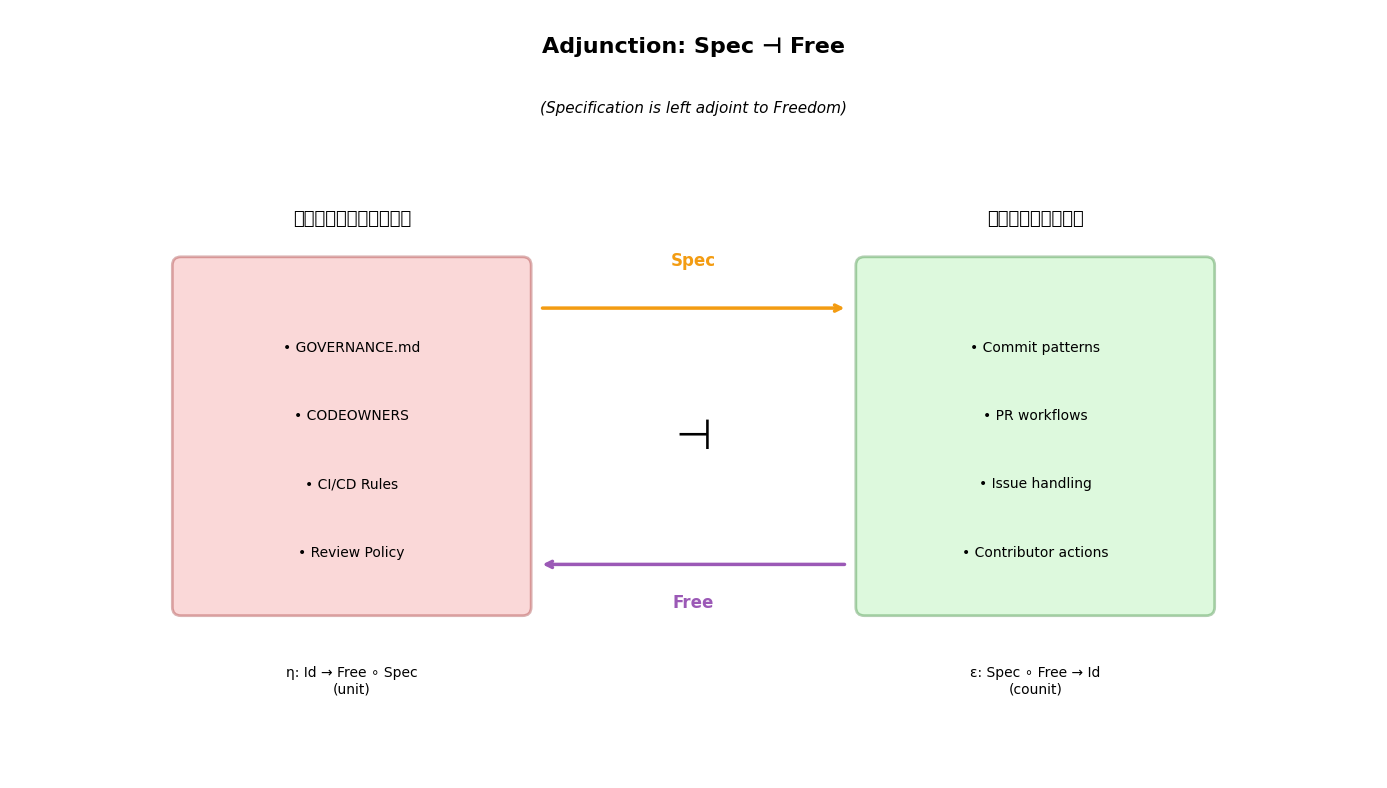

Saved: ../docs/diagrams/04_adjunction_spec_free.png

  Interpretation:
  • Spec(constraints) = behaviors that satisfy constraints
  • Free(behaviors) = minimal constraints allowing behaviors
  • Stadium: Free(behaviors) ≈ ∅ (minimal constraints)
  • Federation: |Spec(constraints)| large (many valid behaviors)


In [5]:
def draw_adjunction():
    """Draw the Specification ⊣ Freedom adjunction."""
    fig, ax = plt.subplots(figsize=(14, 10))
    ax.set_xlim(-1, 15)
    ax.set_ylim(2, 11)
    ax.set_aspect('equal')
    ax.axis('off')
    
    # Title
    ax.text(7, 10.5, 'Adjunction: Spec ⊣ Free', 
            fontsize=16, fontweight='bold', ha='center')
    ax.text(7, 9.8, '(Specification is left adjoint to Freedom)', 
            fontsize=11, ha='center', style='italic')
    
    # Category of Constraints (left)
    ax.text(3, 8.5, '𝐂𝐨𝐧𝐬𝐭𝐫𝐚𝐢𝐧𝐭𝐬', fontsize=13, fontweight='bold', ha='center')
    
    constraint_box = FancyBboxPatch((1, 4), 4, 4,
                                    boxstyle="round,pad=0.1",
                                    facecolor='lightcoral', edgecolor='darkred',
                                    linewidth=2, alpha=0.3)
    ax.add_patch(constraint_box)
    
    constraints = ['GOVERNANCE.md', 'CODEOWNERS', 'CI/CD Rules', 'Review Policy']
    for i, c in enumerate(constraints):
        ax.text(3, 7 - i*0.8, f'• {c}', fontsize=10, ha='center')
    
    # Category of Behaviors (right)
    ax.text(11, 8.5, '𝐁𝐞𝐡𝐚𝐯𝐢𝐨𝐫𝐬', fontsize=13, fontweight='bold', ha='center')
    
    behavior_box = FancyBboxPatch((9, 4), 4, 4,
                                  boxstyle="round,pad=0.1",
                                  facecolor='lightgreen', edgecolor='darkgreen',
                                  linewidth=2, alpha=0.3)
    ax.add_patch(behavior_box)
    
    behaviors = ['Commit patterns', 'PR workflows', 'Issue handling', 'Contributor actions']
    for i, b in enumerate(behaviors):
        ax.text(11, 7 - i*0.8, f'• {b}', fontsize=10, ha='center')
    
    # Adjunction arrows
    # Spec: Constraints → Behaviors (top arrow, going right)
    ax.annotate('', xy=(8.8, 7.5), xytext=(5.2, 7.5),
               arrowprops=dict(arrowstyle='->', lw=2.5, color=COLORS['adjunction']))
    ax.text(7, 8, 'Spec', fontsize=12, fontweight='bold', 
           ha='center', color=COLORS['adjunction'])
    
    # Free: Behaviors → Constraints (bottom arrow, going left)
    ax.annotate('', xy=(5.2, 4.5), xytext=(8.8, 4.5),
               arrowprops=dict(arrowstyle='->', lw=2.5, color=COLORS['functor']))
    ax.text(7, 4, 'Free', fontsize=12, fontweight='bold', 
           ha='center', color=COLORS['functor'])
    
    # Adjunction symbol
    ax.text(7, 6, '⊣', fontsize=30, ha='center', va='center')
    
    # Unit and Counit
    ax.text(3, 3, 'η: Id → Free ∘ Spec\n(unit)', fontsize=10, ha='center')
    ax.text(11, 3, 'ε: Spec ∘ Free → Id\n(counit)', fontsize=10, ha='center')
    
    plt.tight_layout()
    plt.savefig(output_dir / '04_adjunction_spec_free.png', dpi=150, bbox_inches='tight',
               facecolor='white', edgecolor='none')
    plt.show()
    
    # Print interpretation to console
    print(f"Saved: {output_dir / '04_adjunction_spec_free.png'}")
    print("\n  Interpretation:")
    print("  • Spec(constraints) = behaviors that satisfy constraints")
    print("  • Free(behaviors) = minimal constraints allowing behaviors")
    print("  • Stadium: Free(behaviors) ≈ ∅ (minimal constraints)")
    print("  • Federation: |Spec(constraints)| large (many valid behaviors)")

draw_adjunction()

## 5. Commutative Diagram: Entropy Preservation

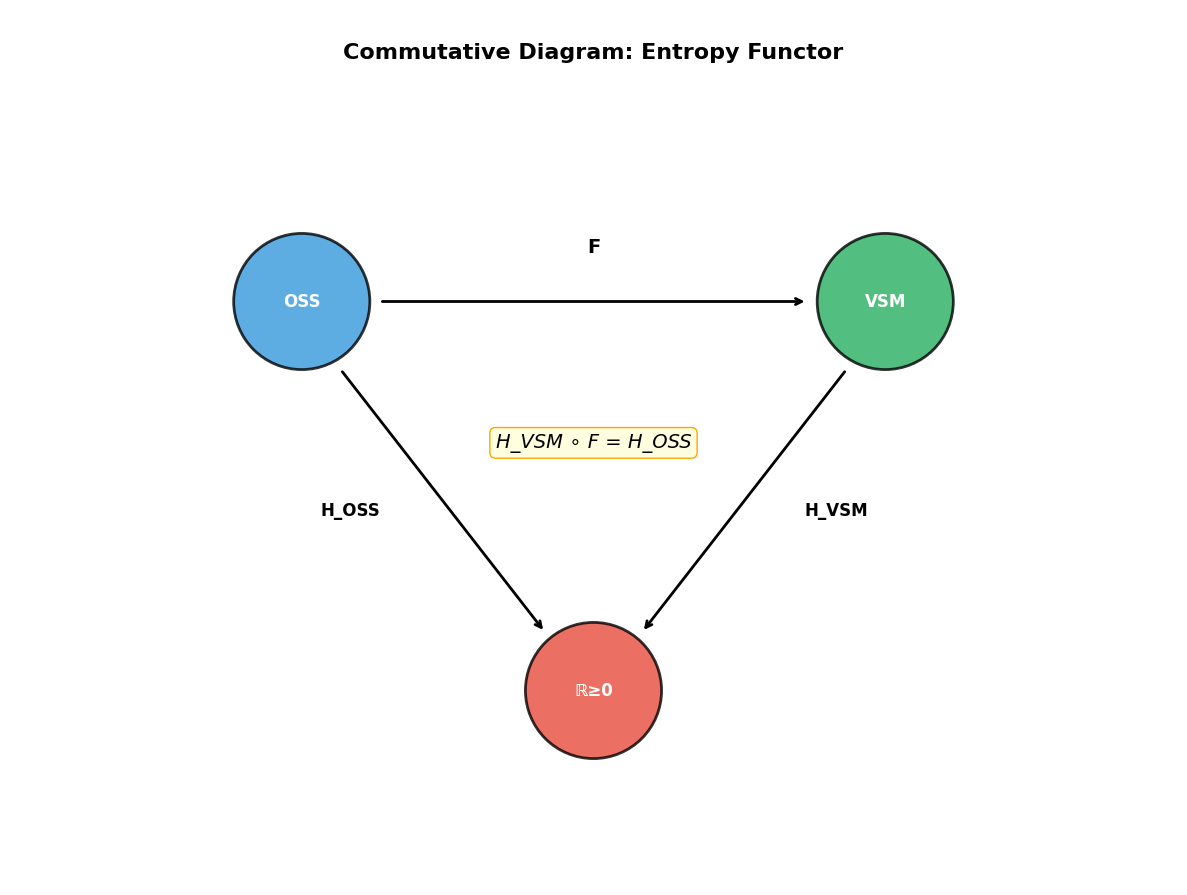

Saved: ../docs/diagrams/05_commutative_entropy.png

  This diagram commutes:
  H_OSS(Stadium) = H_VSM(F(Stadium)) = low entropy
  H_OSS(Federation) = H_VSM(F(Federation)) = high entropy

  The functor F preserves entropy structure:
  • Stadium's concentrated contributions → VSM's minimal coordination
  • Federation's distributed contributions → VSM's full coordination


In [6]:
def draw_commutative_diagram():
    """Draw a commutative diagram showing entropy functoriality."""
    fig, ax = plt.subplots(figsize=(12, 10))
    ax.set_xlim(-1, 11)
    ax.set_ylim(2, 11)
    ax.set_aspect('equal')
    ax.axis('off')
    
    # Title
    ax.text(5, 10.5, 'Commutative Diagram: Entropy Functor', 
            fontsize=16, fontweight='bold', ha='center')
    
    # Objects
    objects = {
        'OSS':    (2, 8, '#3498DB'),
        'VSM':    (8, 8, '#27AE60'),
        'ℝ≥0':    (5, 4, '#E74C3C'),  # Non-negative reals (entropy values)
    }
    
    for name, (x, y, color) in objects.items():
        circle = Circle((x, y), 0.7, fill=True, facecolor=color,
                        edgecolor='black', linewidth=2, alpha=0.8)
        ax.add_patch(circle)
        ax.text(x, y, name, ha='center', va='center',
               fontsize=12, fontweight='bold', color='white')
    
    # Morphisms
    # F: OSS → VSM
    ax.annotate('', xy=(7.2, 8), xytext=(2.8, 8),
               arrowprops=dict(arrowstyle='->', lw=2, color='black'))
    ax.text(5, 8.5, 'F', fontsize=14, fontweight='bold', ha='center')
    
    # H_OSS: OSS → ℝ≥0 (entropy on OSS)
    ax.annotate('', xy=(4.5, 4.6), xytext=(2.4, 7.3),
               arrowprops=dict(arrowstyle='->', lw=2, color='black'))
    ax.text(2.5, 5.8, 'H_OSS', fontsize=12, fontweight='bold', ha='center')
    
    # H_VSM: VSM → ℝ≥0 (entropy on VSM)
    ax.annotate('', xy=(5.5, 4.6), xytext=(7.6, 7.3),
               arrowprops=dict(arrowstyle='->', lw=2, color='black'))
    ax.text(7.5, 5.8, 'H_VSM', fontsize=12, fontweight='bold', ha='center')
    
    # Commutativity statement
    ax.text(5, 6.5, 'H_VSM ∘ F = H_OSS', fontsize=14, 
           ha='center', style='italic',
           bbox=dict(boxstyle='round', facecolor='lightyellow', edgecolor='orange'))
    
    plt.tight_layout()
    plt.savefig(output_dir / '05_commutative_entropy.png', dpi=150, bbox_inches='tight',
               facecolor='white', edgecolor='none')
    plt.show()
    
    # Print explanation to console
    print(f"Saved: {output_dir / '05_commutative_entropy.png'}")
    print("\n  This diagram commutes:")
    print("  H_OSS(Stadium) = H_VSM(F(Stadium)) = low entropy")
    print("  H_OSS(Federation) = H_VSM(F(Federation)) = high entropy")
    print("")
    print("  The functor F preserves entropy structure:")
    print("  • Stadium's concentrated contributions → VSM's minimal coordination")
    print("  • Federation's distributed contributions → VSM's full coordination")

draw_commutative_diagram()

## 6. Natural Transformation: Evolution Over Time

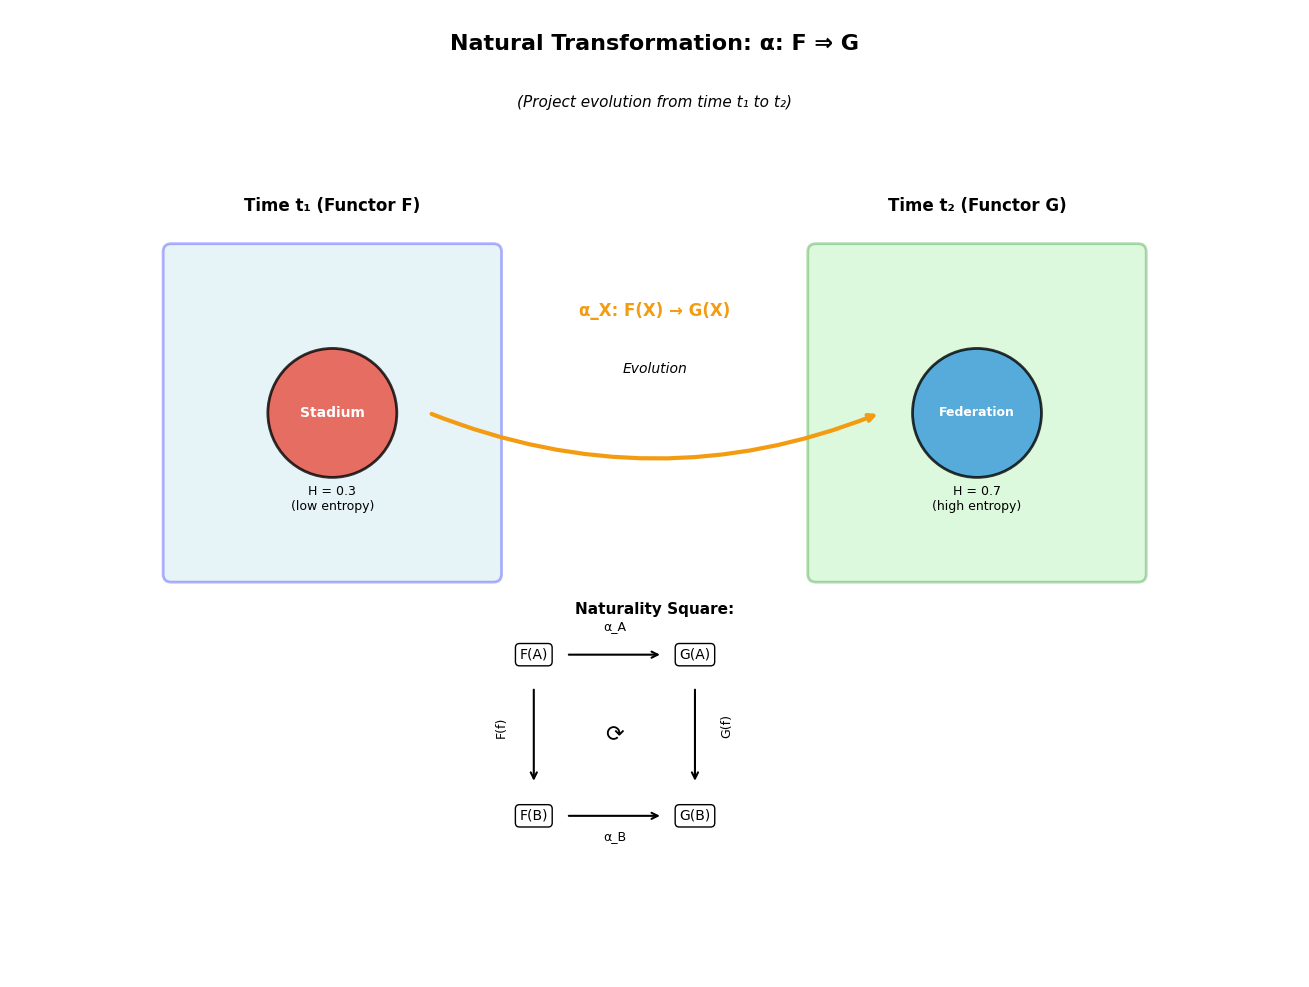

Saved: ../docs/diagrams/06_natural_transformation.png


In [7]:
def draw_natural_transformation():
    """Draw natural transformation representing project evolution."""
    fig, ax = plt.subplots(figsize=(14, 10))
    ax.set_xlim(-1, 15)
    ax.set_ylim(-1, 11)
    ax.set_aspect('equal')
    ax.axis('off')
    
    # Title
    ax.text(7, 10.5, 'Natural Transformation: α: F ⇒ G', 
            fontsize=16, fontweight='bold', ha='center')
    ax.text(7, 9.8, '(Project evolution from time t₁ to t₂)', 
            fontsize=11, ha='center', style='italic')
    
    # Time t1 (Functor F)
    ax.text(3, 8.5, 'Time t₁ (Functor F)', fontsize=12, fontweight='bold', ha='center')
    
    t1_box = FancyBboxPatch((1, 4), 4, 4,
                            boxstyle="round,pad=0.1",
                            facecolor='lightblue', edgecolor='blue',
                            linewidth=2, alpha=0.3)
    ax.add_patch(t1_box)
    
    # Stadium at t1
    circle_t1 = Circle((3, 6), 0.8, fill=True, facecolor=COLORS['stadium'],
                        edgecolor='black', linewidth=2, alpha=0.8)
    ax.add_patch(circle_t1)
    ax.text(3, 6, 'Stadium', ha='center', va='center', fontsize=10, 
           fontweight='bold', color='white')
    ax.text(3, 4.8, 'H = 0.3\n(low entropy)', ha='center', fontsize=9)
    
    # Time t2 (Functor G)
    ax.text(11, 8.5, 'Time t₂ (Functor G)', fontsize=12, fontweight='bold', ha='center')
    
    t2_box = FancyBboxPatch((9, 4), 4, 4,
                            boxstyle="round,pad=0.1",
                            facecolor='lightgreen', edgecolor='green',
                            linewidth=2, alpha=0.3)
    ax.add_patch(t2_box)
    
    # Federation at t2
    circle_t2 = Circle((11, 6), 0.8, fill=True, facecolor=COLORS['federation'],
                        edgecolor='black', linewidth=2, alpha=0.8)
    ax.add_patch(circle_t2)
    ax.text(11, 6, 'Federation', ha='center', va='center', fontsize=9, 
           fontweight='bold', color='white')
    ax.text(11, 4.8, 'H = 0.7\n(high entropy)', ha='center', fontsize=9)
    
    # Natural transformation arrow
    ax.annotate('', xy=(9.8, 6), xytext=(4.2, 6),
               arrowprops=dict(arrowstyle='->', lw=3, color=COLORS['adjunction'],
                              connectionstyle='arc3,rad=0.2'))
    ax.text(7, 7.2, 'α_X: F(X) → G(X)', fontsize=12, fontweight='bold', 
           ha='center', color=COLORS['adjunction'])
    ax.text(7, 6.5, 'Evolution', fontsize=10, ha='center', style='italic')
    
    # Naturality square
    ax.text(7, 3.5, 'Naturality Square:', fontsize=11, fontweight='bold', ha='center')
    
    # Draw small naturality square
    sq_x, sq_y = 5.5, 1
    sq_size = 2
    
    # Corners
    corners = {
        'F(A)': (sq_x, sq_y + sq_size),
        'G(A)': (sq_x + sq_size, sq_y + sq_size),
        'F(B)': (sq_x, sq_y),
        'G(B)': (sq_x + sq_size, sq_y),
    }
    
    for name, (x, y) in corners.items():
        ax.text(x, y, name, ha='center', va='center', fontsize=10,
               bbox=dict(boxstyle='round', facecolor='white', edgecolor='black'))
    
    # Arrows
    # Top: F(A) → G(A)
    ax.annotate('', xy=(sq_x + sq_size - 0.4, sq_y + sq_size), 
               xytext=(sq_x + 0.4, sq_y + sq_size),
               arrowprops=dict(arrowstyle='->', lw=1.5))
    ax.text(sq_x + sq_size/2, sq_y + sq_size + 0.3, 'α_A', fontsize=9, ha='center')
    
    # Bottom: F(B) → G(B)
    ax.annotate('', xy=(sq_x + sq_size - 0.4, sq_y), 
               xytext=(sq_x + 0.4, sq_y),
               arrowprops=dict(arrowstyle='->', lw=1.5))
    ax.text(sq_x + sq_size/2, sq_y - 0.3, 'α_B', fontsize=9, ha='center')
    
    # Left: F(A) → F(B)
    ax.annotate('', xy=(sq_x, sq_y + 0.4), 
               xytext=(sq_x, sq_y + sq_size - 0.4),
               arrowprops=dict(arrowstyle='->', lw=1.5))
    ax.text(sq_x - 0.4, sq_y + sq_size/2, 'F(f)', fontsize=9, ha='center', rotation=90)
    
    # Right: G(A) → G(B)
    ax.annotate('', xy=(sq_x + sq_size, sq_y + 0.4), 
               xytext=(sq_x + sq_size, sq_y + sq_size - 0.4),
               arrowprops=dict(arrowstyle='->', lw=1.5))
    ax.text(sq_x + sq_size + 0.4, sq_y + sq_size/2, 'G(f)', fontsize=9, ha='center', rotation=90)
    
    # Commutes label
    ax.text(sq_x + sq_size/2, sq_y + sq_size/2, '⟳', fontsize=16, ha='center', va='center')
    
    plt.tight_layout()
    plt.savefig(output_dir / '06_natural_transformation.png', dpi=150, bbox_inches='tight',
               facecolor='white', edgecolor='none')
    plt.show()
    print(f"Saved: {output_dir / '06_natural_transformation.png'}")

draw_natural_transformation()

## 7. Terminal Object: Stadium as Limit

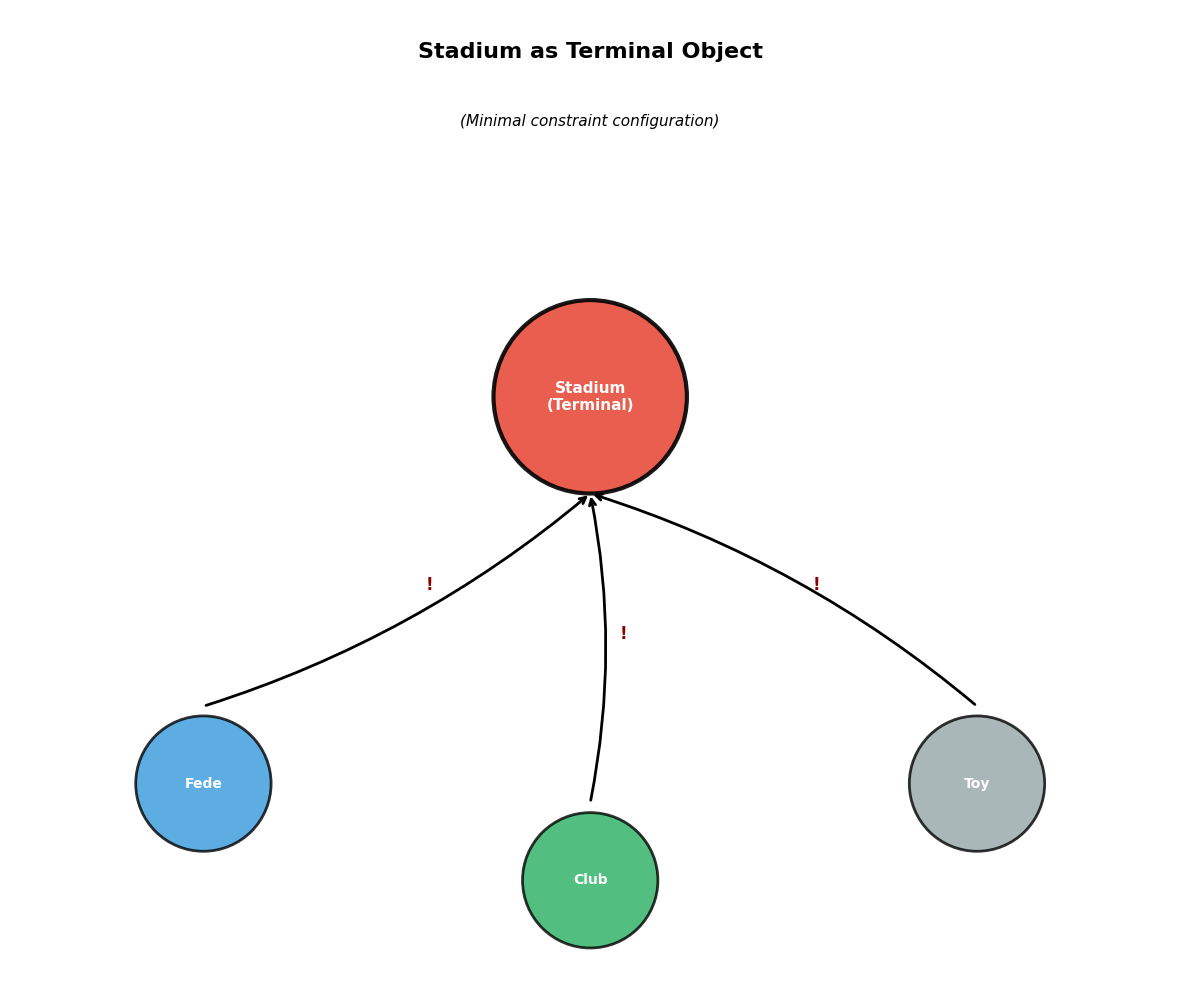

Saved: ../docs/diagrams/07_terminal_object.png

  Terminal Object Property:
  For every object X in the category,
  there exists a unique morphism ! : X → Stadium

  Interpretation:
  • Every governance type can 'collapse' to Stadium
  • Stadium represents minimal organizational constraints
  • The ! morphism is 'remove governance overhead'
  • Stadium = lim(Constraints → ∅)


In [8]:
def draw_terminal_object():
    """Draw Stadium as terminal object in constraint category."""
    fig, ax = plt.subplots(figsize=(12, 10))
    ax.set_xlim(-1, 11)
    ax.set_ylim(1, 11)
    ax.set_aspect('equal')
    ax.axis('off')
    
    # Title
    ax.text(5, 10.5, 'Stadium as Terminal Object', 
            fontsize=16, fontweight='bold', ha='center')
    ax.text(5, 9.8, '(Minimal constraint configuration)', 
            fontsize=11, ha='center', style='italic')
    
    # Stadium (terminal object) at center top
    stadium_circle = Circle((5, 7), 1, fill=True, facecolor=COLORS['stadium'],
                            edgecolor='black', linewidth=3, alpha=0.9)
    ax.add_patch(stadium_circle)
    ax.text(5, 7, 'Stadium\n(Terminal)', ha='center', va='center', 
           fontsize=11, fontweight='bold', color='white')
    
    # Other governance types pointing to Stadium
    other_types = [
        ('Federation', 1, 3, COLORS['federation']),
        ('Club', 5, 2, COLORS['club']),
        ('Toy', 9, 3, COLORS['toy']),
    ]
    
    for name, x, y, color in other_types:
        circle = Circle((x, y), 0.7, fill=True, facecolor=color,
                        edgecolor='black', linewidth=2, alpha=0.8)
        ax.add_patch(circle)
        ax.text(x, y, name[:4], ha='center', va='center', 
               fontsize=10, fontweight='bold', color='white')
        
        # Unique arrow to terminal
        ax.annotate('', xy=(5, 6), xytext=(x, y + 0.8),
                   arrowprops=dict(arrowstyle='->', lw=2, color='black',
                                  connectionstyle='arc3,rad=0.1'))
        ax.text((x + 5)/2 + 0.3, (y + 7)/2, '!', fontsize=12, 
               fontweight='bold', color='darkred')
    
    plt.tight_layout()
    plt.savefig(output_dir / '07_terminal_object.png', dpi=150, bbox_inches='tight',
               facecolor='white', edgecolor='none')
    plt.show()
    
    # Print explanation to console
    print(f"Saved: {output_dir / '07_terminal_object.png'}")
    print("\n  Terminal Object Property:")
    print("  For every object X in the category,")
    print("  there exists a unique morphism ! : X → Stadium")
    print("")
    print("  Interpretation:")
    print("  • Every governance type can 'collapse' to Stadium")
    print("  • Stadium represents minimal organizational constraints")
    print("  • The ! morphism is 'remove governance overhead'")
    print("  • Stadium = lim(Constraints → ∅)")

draw_terminal_object()

## 8. Complete Framework Overview

/var/folders/vv/ckmfyvqd4hj331_36wmp26l80000gn/T/ipykernel_73769/3738747956.py:74: UserWarning: Glyph 119822 (\N{MATHEMATICAL BOLD CAPITAL O}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vv/ckmfyvqd4hj331_36wmp26l80000gn/T/ipykernel_73769/3738747956.py:74: UserWarning: Glyph 119826 (\N{MATHEMATICAL BOLD CAPITAL S}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vv/ckmfyvqd4hj331_36wmp26l80000gn/T/ipykernel_73769/3738747956.py:74: UserWarning: Glyph 119829 (\N{MATHEMATICAL BOLD CAPITAL V}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vv/ckmfyvqd4hj331_36wmp26l80000gn/T/ipykernel_73769/3738747956.py:74: UserWarning: Glyph 119820 (\N{MATHEMATICAL BOLD CAPITAL M}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vv/ckmfyvqd4hj331_36wmp26l80000gn/T/ipykernel_73769/3738747956.py:74: UserWarning: Glyph 119812 (\N{MATHEMATICAL BOLD CAPITAL E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folde

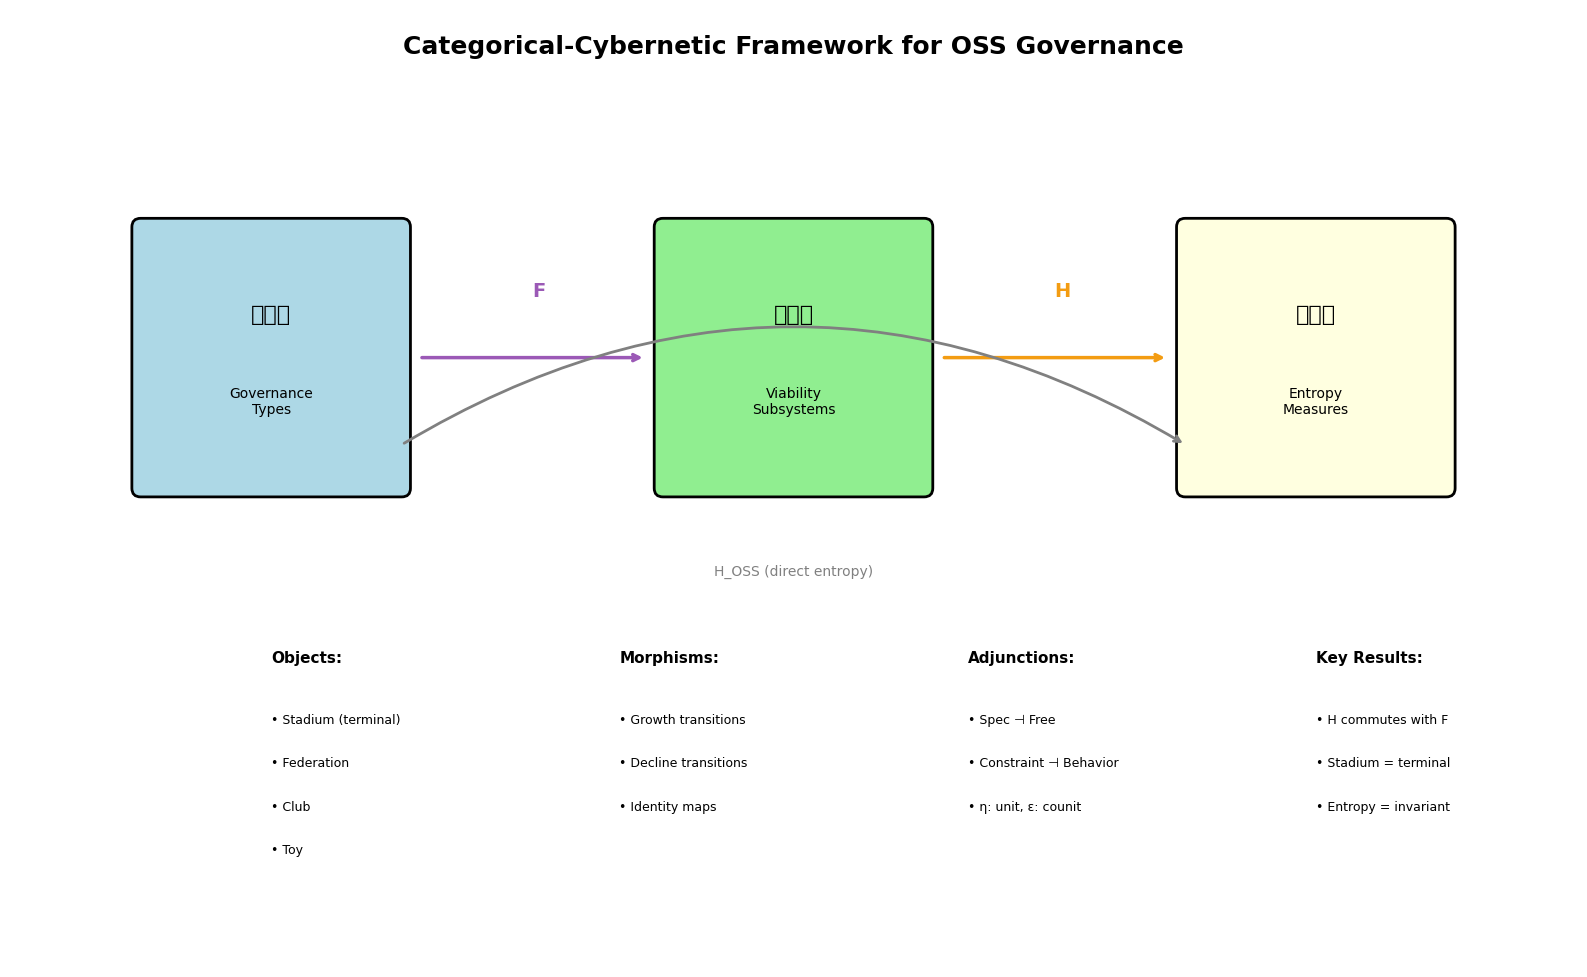

Saved: ../docs/diagrams/08_framework_overview.png

  Main Theorem:
  The functor F: OSS → VSM preserves entropy in the sense that
  H_VSM ∘ F = H_OSS, where H measures organizational entropy.

  Stadium projects are characterized as terminal objects in the
  subcategory of minimal-constraint configurations, exhibiting
  minimal entropy H(Stadium) < H(Federation) with Cohen's d > 0.8.


In [9]:
def draw_framework_overview():
    """Draw complete categorical-cybernetic framework."""
    fig, ax = plt.subplots(figsize=(16, 12))
    ax.set_xlim(-1, 17)
    ax.set_ylim(2, 13)
    ax.set_aspect('equal')
    ax.axis('off')
    
    # Title
    ax.text(8, 12.5, 'Categorical-Cybernetic Framework for OSS Governance', 
            fontsize=18, fontweight='bold', ha='center')
    
    # Three main categories
    categories = [
        ('𝐎𝐒𝐒', 2, 9, 'lightblue', 'Governance\nTypes'),
        ('𝐕𝐒𝐌', 8, 9, 'lightgreen', 'Viability\nSubsystems'),
        ('𝐄𝐧𝐭', 14, 9, 'lightyellow', 'Entropy\nMeasures'),
    ]
    
    for name, x, y, color, desc in categories:
        box = FancyBboxPatch((x-1.5, y-1.5), 3, 3,
                             boxstyle="round,pad=0.1",
                             facecolor=color, edgecolor='black',
                             linewidth=2)
        ax.add_patch(box)
        ax.text(x, y + 0.5, name, ha='center', va='center', 
               fontsize=16, fontweight='bold')
        ax.text(x, y - 0.5, desc, ha='center', va='center', fontsize=10)
    
    # Functors
    # F: OSS → VSM
    ax.annotate('', xy=(6.3, 9), xytext=(3.7, 9),
               arrowprops=dict(arrowstyle='->', lw=2.5, color=COLORS['functor']))
    ax.text(5, 9.7, 'F', fontsize=14, fontweight='bold', color=COLORS['functor'])
    
    # H: OSS → Ent
    ax.annotate('', xy=(12.3, 9), xytext=(9.7, 9),
               arrowprops=dict(arrowstyle='->', lw=2.5, color=COLORS['adjunction']))
    ax.text(11, 9.7, 'H', fontsize=14, fontweight='bold', color=COLORS['adjunction'])
    
    # Direct H_OSS: OSS → Ent (curved)
    ax.annotate('', xy=(12.5, 8), xytext=(3.5, 8),
               arrowprops=dict(arrowstyle='->', lw=2, color='gray',
                              connectionstyle='arc3,rad=-0.3'))
    ax.text(8, 6.5, 'H_OSS (direct entropy)', fontsize=10, ha='center', color='gray')
    
    # Key components section
    components_y = 4
    
    # Objects
    ax.text(2, components_y + 1.5, 'Objects:', fontsize=11, fontweight='bold')
    obj_items = ['Stadium (terminal)', 'Federation', 'Club', 'Toy']
    for i, item in enumerate(obj_items):
        ax.text(2, components_y + 0.8 - i*0.5, f'• {item}', fontsize=9)
    
    # Morphisms  
    ax.text(6, components_y + 1.5, 'Morphisms:', fontsize=11, fontweight='bold')
    morph_items = ['Growth transitions', 'Decline transitions', 'Identity maps']
    for i, item in enumerate(morph_items):
        ax.text(6, components_y + 0.8 - i*0.5, f'• {item}', fontsize=9)
    
    # Adjunctions
    ax.text(10, components_y + 1.5, 'Adjunctions:', fontsize=11, fontweight='bold')
    adj_items = ['Spec ⊣ Free', 'Constraint ⊣ Behavior', 'η: unit, ε: counit']
    for i, item in enumerate(adj_items):
        ax.text(10, components_y + 0.8 - i*0.5, f'• {item}', fontsize=9)
    
    # Key Results
    ax.text(14, components_y + 1.5, 'Key Results:', fontsize=11, fontweight='bold')
    results = ['H commutes with F', 'Stadium = terminal', 'Entropy = invariant']
    for i, item in enumerate(results):
        ax.text(14, components_y + 0.8 - i*0.5, f'• {item}', fontsize=9)
    
    plt.tight_layout()
    plt.savefig(output_dir / '08_framework_overview.png', dpi=150, bbox_inches='tight',
               facecolor='white', edgecolor='none')
    plt.show()
    
    # Print main theorem to console
    print(f"Saved: {output_dir / '08_framework_overview.png'}")
    print("\n  Main Theorem:")
    print("  The functor F: OSS → VSM preserves entropy in the sense that")
    print("  H_VSM ∘ F = H_OSS, where H measures organizational entropy.")
    print("")
    print("  Stadium projects are characterized as terminal objects in the")
    print("  subcategory of minimal-constraint configurations, exhibiting")
    print("  minimal entropy H(Stadium) < H(Federation) with Cohen's d > 0.8.")

draw_framework_overview()

## 9. Generate All Diagrams

In [10]:
# Generate all diagrams
print("Generating all Category Theory diagrams...")
print("="*60)

diagrams = [
    ("01_oss_category.png", draw_oss_category),
    ("02_vsm_category.png", draw_vsm_category),
    ("03_functor_oss_vsm.png", draw_functor_diagram),
    ("04_adjunction_spec_free.png", draw_adjunction),
    ("05_commutative_entropy.png", draw_commutative_diagram),
    ("06_natural_transformation.png", draw_natural_transformation),
    ("07_terminal_object.png", draw_terminal_object),
    ("08_framework_overview.png", draw_framework_overview),
]

print(f"\n✅ All {len(diagrams)} diagrams saved to: {output_dir}/")
print("\nDiagram files:")
for f in sorted(output_dir.glob("*.png")):
    size_kb = f.stat().st_size / 1024
    print(f"  • {f.name} ({size_kb:.1f} KB)")

Generating all Category Theory diagrams...

✅ All 8 diagrams saved to: ../docs/diagrams/

Diagram files:
  • 01_oss_category.png (135.0 KB)
  • 02_vsm_category.png (86.3 KB)
  • 03_functor_oss_vsm.png (94.0 KB)
  • 04_adjunction_spec_free.png (67.0 KB)
  • 05_commutative_entropy.png (82.0 KB)
  • 06_natural_transformation.png (93.5 KB)
  • 07_terminal_object.png (103.7 KB)
  • 08_framework_overview.png (97.8 KB)
  • bus_factor_temporal.png (2738.0 KB)
  • category_transition_analysis.png (180.0 KB)
  • h2_fork_prediction.png (237.3 KB)
  • ostrom_entropy_correlation.png (235.5 KB)
  • sustainability_risk_dashboard.png (171.3 KB)
  • temporal_entropy_evolution.png (5488.1 KB)
  • vsm_compression_analysis.png (283.4 KB)
  • vsm_heatmap.png (750.8 KB)
  • vsm_radar_charts.png (7672.5 KB)
  • vsm_radar_sample.png (495.0 KB)


## Summary

This notebook generates publication-ready diagrams for:

1. **OSS Category** - Objects (Stadium, Federation, Club, Toy) and morphisms (transitions)
2. **VSM Category** - Viable System Model subsystems (S1-S5)
3. **Functor F: OSS → VSM** - Structure-preserving mapping
4. **Adjunction Spec ⊣ Free** - Governance specification vs contributor freedom
5. **Commutative Diagram** - Entropy preservation under functor
6. **Natural Transformation** - Project evolution over time
7. **Terminal Object** - Stadium as minimal constraint configuration
8. **Framework Overview** - Complete categorical-cybernetic framework

All diagrams saved to `docs/diagrams/`